In [1]:
library(data.table)
library(ggplot2)

options(repr.plot.width = 8, repr.plot.height = 8)

packageVersion("ggplot2")

[1] ‘3.3.3’

In [2]:
dt <- data.table::fread(here::here(".data", "titanic.csv"))
head(dt, 3)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"


## Continuous Distribution, Univariate

### Histogram

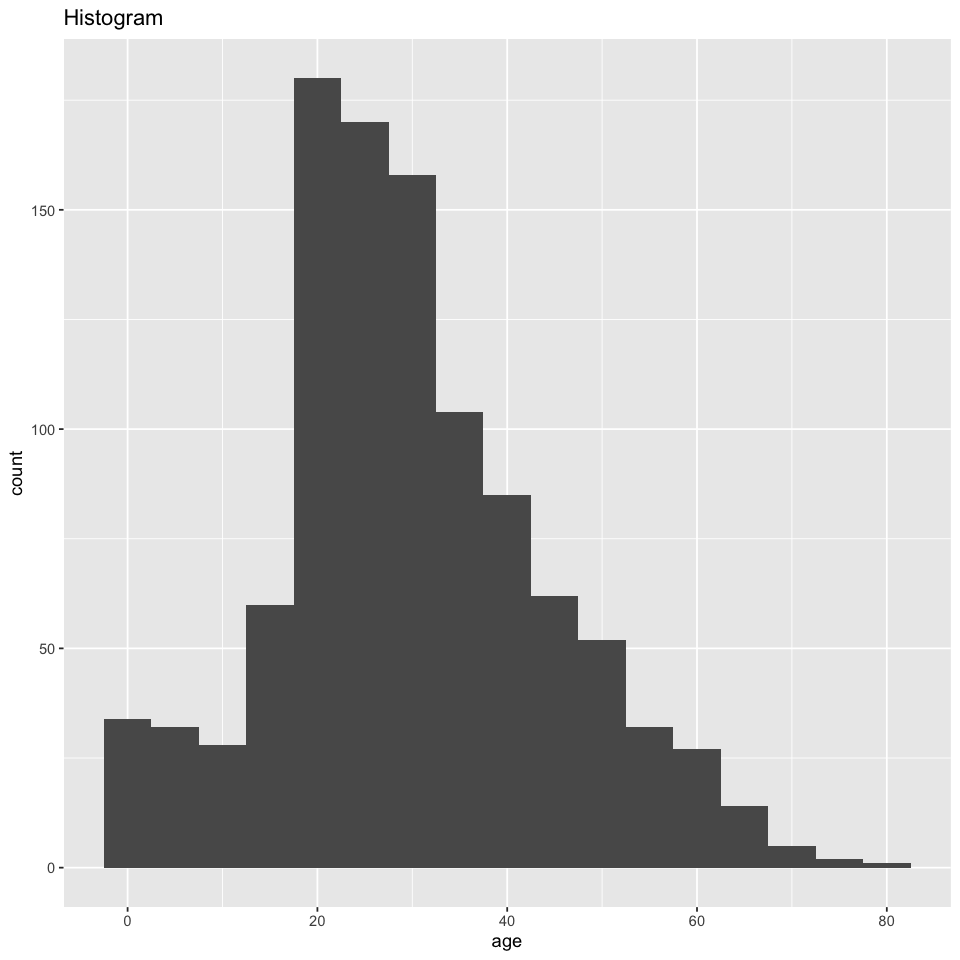

In [3]:
ggplot(dt[!is.na(age)], aes(x = age)) +
  geom_histogram(binwidth = 5) +
  ggtitle("Histogram")

### ECDF

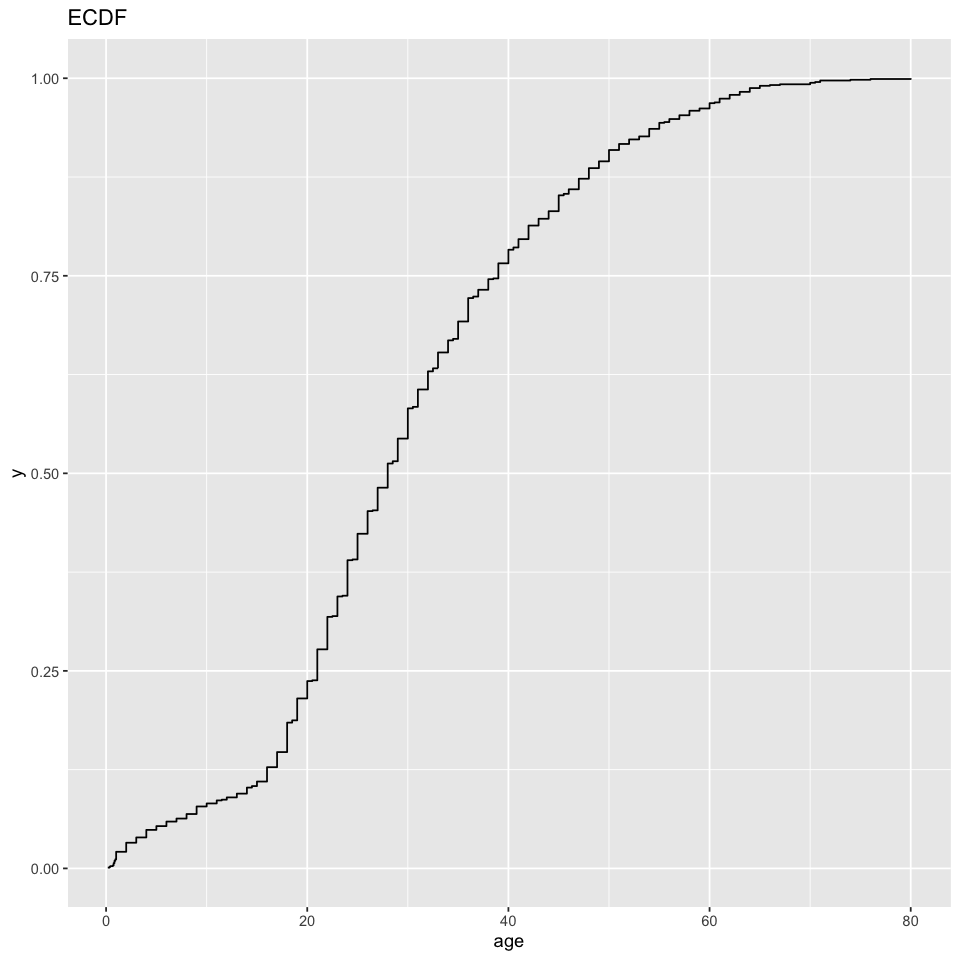

In [4]:
ggplot(dt[!is.na(age)], aes(x = age)) +
  stat_ecdf(pad = FALSE) +
  ggtitle("ECDF")

## Continuous Distribution, grouped by Categorical

### Box Plots

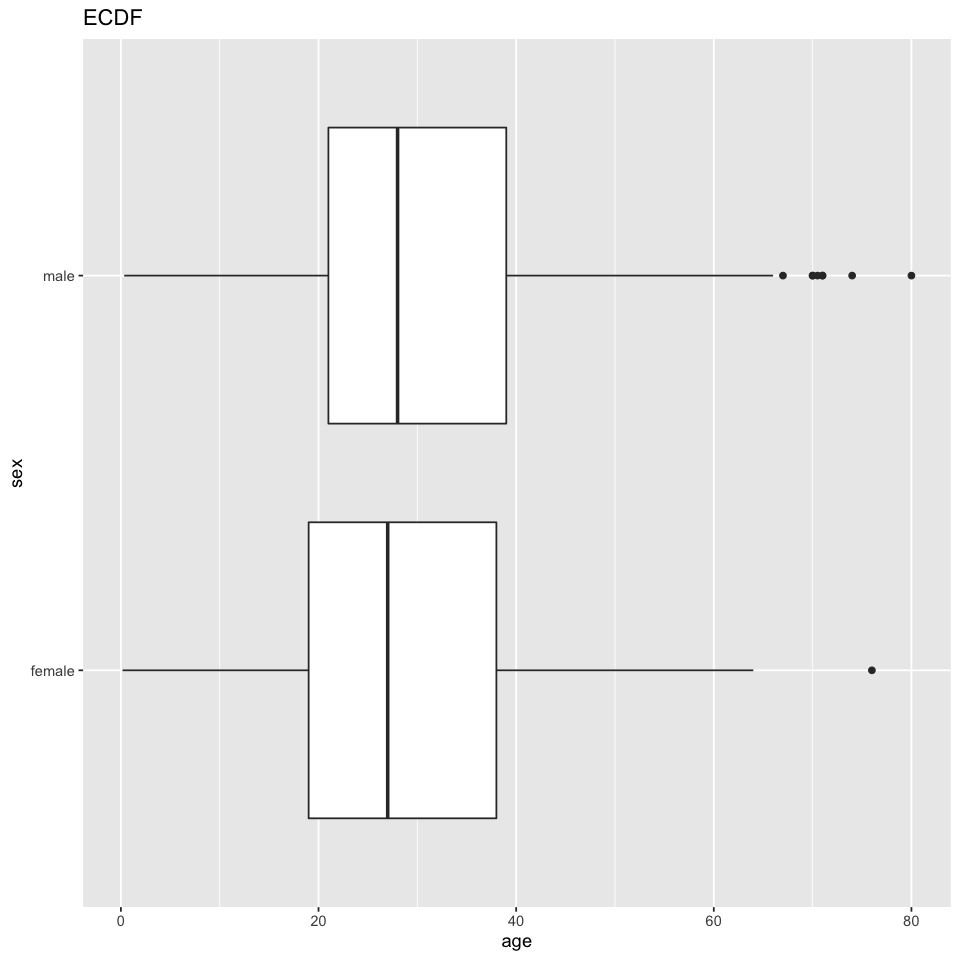

In [5]:
ggplot(dt[!is.na(age)], aes(x = sex, y = age)) +
  geom_boxplot() +
  coord_flip() +
  ggtitle("ECDF")

### Violin Plots

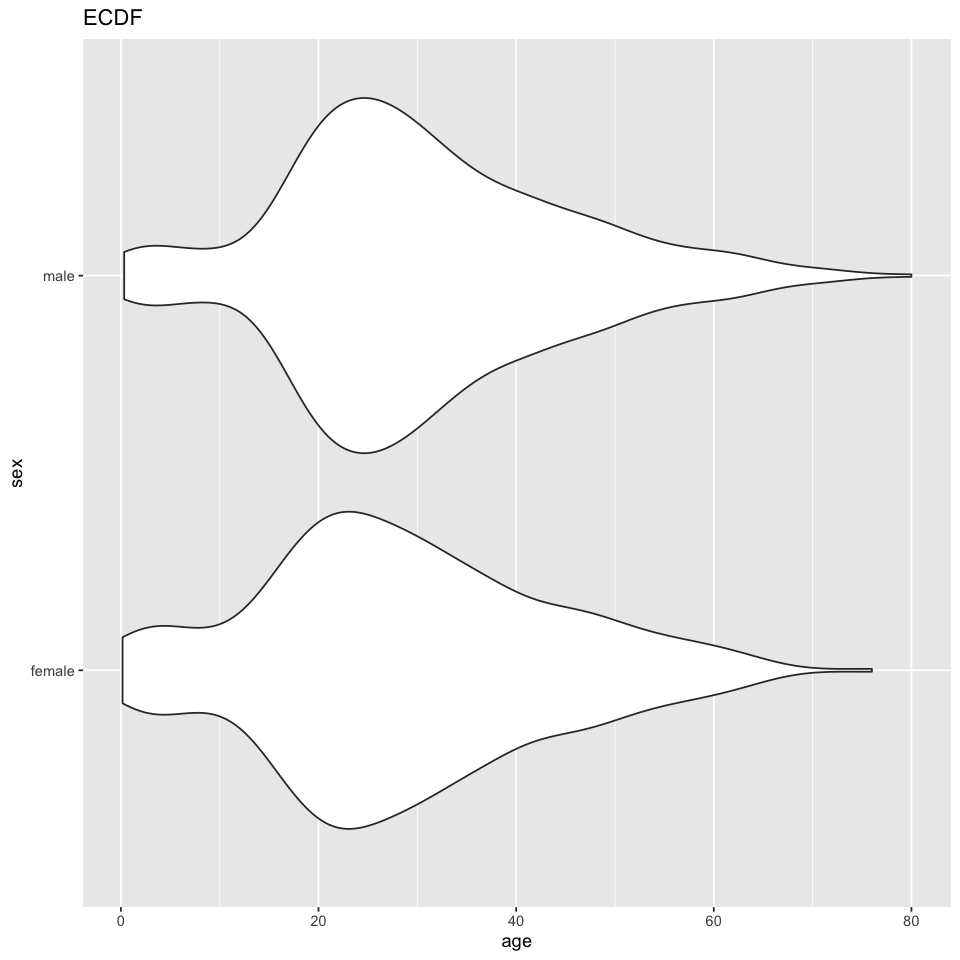

In [6]:
ggplot(dt[!is.na(age)], aes(x = sex, y = age)) +
  geom_violin() +
  coord_flip() +
  ggtitle("ECDF")

## Continuous Metric, grouped by Categorical

In [7]:
mean_age_by_pclass <- dt[, .(mean_age = mean(age, na.rm = TRUE)), by = "pclass"]

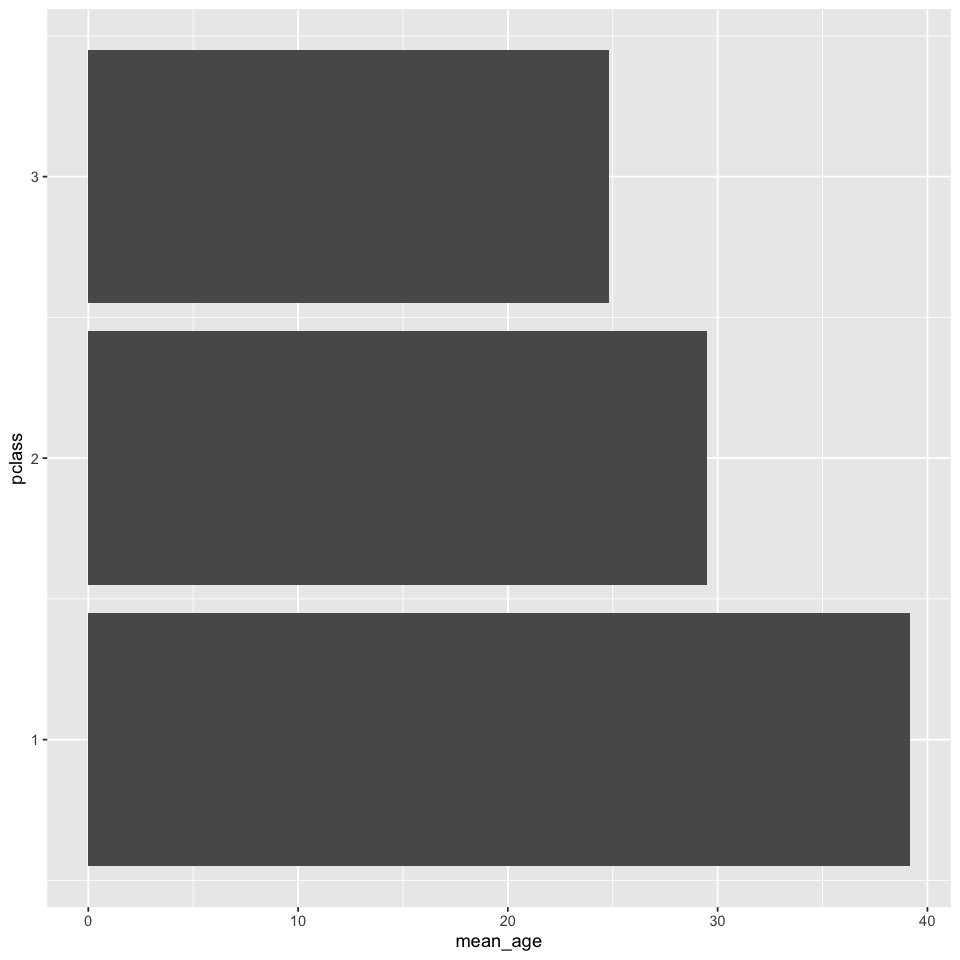

In [8]:
ggplot(mean_age_by_pclass, aes(x = pclass, y = mean_age)) +
  geom_bar(stat = "identity") +
  coord_flip()